# LodeSTAR particle shape test

This document is used to test segmentation performance of different datasets. Additional plots for variations between runs and segmentation performance are at the end.

## Load data

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader

# Create a custom dataset class to make it compatible with the DataLoader
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Load circle
dataset = torch.load('data/dataset_C.pt')
test_dataset_C = dataset['test']
train_dataset_C = dataset['train']
test_dataloader_C = DataLoader(test_dataset_C, batch_size=8, shuffle=False)
train_dataloader_C = DataLoader(train_dataset_C, batch_size=8, shuffle=True)

# Load ellipse
dataset = torch.load('data/dataset_E.pt')
test_dataset_E = dataset['test']
train_dataset_E = dataset['train']
test_dataloader_E = DataLoader(test_dataset_E, batch_size=8, shuffle=False)
train_dataloader_E = DataLoader(train_dataset_E, batch_size=8, shuffle=True)

# Load moon
dataset = torch.load('data/dataset_M.pt')
test_dataset_M = dataset['test']
train_dataset_M = dataset['train']
test_dataloader_M = DataLoader(test_dataset_M, batch_size=8, shuffle=False)
train_dataloader_M = DataLoader(train_dataset_M, batch_size=8, shuffle=True)

# Load star
dataset = torch.load('data/dataset_S.pt')
test_dataset_S = dataset['test']
train_dataset_S = dataset['train']
test_dataloader_S = DataLoader(test_dataset_S, batch_size=8, shuffle=False)
train_dataloader_S = DataLoader(train_dataset_S, batch_size=8, shuffle=True)

# Load filament
dataset = torch.load('data/dataset_F.pt')
test_dataset_F = dataset['test']
train_dataset_F = dataset['train']
test_dataloader_F = DataLoader(test_dataset_F, batch_size=8, shuffle=False)
train_dataloader_F = DataLoader(train_dataset_F, batch_size=8, shuffle=True)

# Load square
dataset = torch.load('data/dataset_Sq.pt')
test_dataset_Sq = dataset['test']
train_dataset_Sq = dataset['train']
test_dataloader_Sq = DataLoader(test_dataset_Sq, batch_size=8, shuffle=False)
train_dataloader_Sq = DataLoader(train_dataset_Sq, batch_size=8, shuffle=True)

# Load CE
dataset = torch.load('data/dataset_CE.pt')
train_dataset_CE = dataset['train']
test_dataset_CE = dataset['test']
train_dataloader_CE = DataLoader(train_dataset_CE, batch_size=8, shuffle=True)
test_dataloader_CE = DataLoader(test_dataset_CE, batch_size=8, shuffle=False)

# Load CM
dataset = torch.load('data/dataset_CM.pt')
train_dataset_CM = dataset['train']
test_dataset_CM = dataset['test']
train_dataloader_CM = DataLoader(train_dataset_CM, batch_size=8, shuffle=True)
test_dataloader_CM = DataLoader(test_dataset_CM, batch_size=8, shuffle=False)

# Load CS
dataset = torch.load('data/dataset_CS.pt')
train_dataset_CS = dataset['train']
test_dataset_CS = dataset['test']
train_dataloader_CS = DataLoader(train_dataset_CS, batch_size=8, shuffle=True)
test_dataloader_CS = DataLoader(test_dataset_CS, batch_size=8, shuffle=False)

# Load CF
dataset = torch.load('data/dataset_CF.pt')
train_dataset_CF = dataset['train']
test_dataset_CF = dataset['test']
train_dataloader_CF = DataLoader(train_dataset_CF, batch_size=8, shuffle=True)
test_dataloader_CF = DataLoader(test_dataset_CF, batch_size=8, shuffle=False)

# Load CSq
dataset = torch.load('data/dataset_CSq.pt')
train_dataset_CSq = dataset['train']
test_dataset_CSq = dataset['test']
train_dataloader_CSq = DataLoader(train_dataset_CSq, batch_size=8, shuffle=True)
test_dataloader_CSq = DataLoader(test_dataset_CSq, batch_size=8, shuffle=False)

# Load ESq
dataset = torch.load('data/dataset_ESq.pt')
train_dataset_ESq = dataset['train']
test_dataset_ESq = dataset['test']
train_dataloader_ESq = DataLoader(train_dataset_ESq, batch_size=8, shuffle=True)
test_dataloader_ESq = DataLoader(test_dataset_ESq, batch_size=8, shuffle=False)

# Load CEM
dataset = torch.load('data/dataset_CEM.pt')
train_dataset_CEM = dataset['train']
test_dataset_CEM = dataset['test']
train_dataloader_CEM = DataLoader(train_dataset_CEM, batch_size=8, shuffle=True)
test_dataloader_CEM = DataLoader(test_dataset_CEM, batch_size=8, shuffle=False)

# Load CES
dataset = torch.load('data/dataset_CES.pt')
train_dataset_CES = dataset['train']
test_dataset_CES = dataset['test']
train_dataloader_CES = DataLoader(train_dataset_CES, batch_size=8, shuffle=True)
test_dataloader_CES = DataLoader(test_dataset_CES, batch_size=8, shuffle=False)

# Load CEF
dataset = torch.load('data/dataset_CEF.pt')
train_dataset_CEF = dataset['train']
test_dataset_CEF = dataset['test']
train_dataloader_CEF = DataLoader(train_dataset_CEF, batch_size=8, shuffle=True)
test_dataloader_CEF = DataLoader(test_dataset_CEF, batch_size=8, shuffle=False)

# Load CESq
dataset = torch.load('data/dataset_CESq.pt')
train_dataset_CESq = dataset['train']
test_dataset_CESq = dataset['test']
train_dataloader_CESq = DataLoader(train_dataset_CESq, batch_size=8, shuffle=True)
test_dataloader_CESq = DataLoader(test_dataset_CESq, batch_size=8, shuffle=False)

# Load dense
test_dataset_CE_d = torch.load('data/dataset_CE_dense.pt')
test_dataloader_CE_d = DataLoader(test_dataset_CE_d, batch_size=8, shuffle=False)

In [5]:
def adjust_learning_rate(optimizer, epoch, initial_lr, milestones, gamma):
    lr = initial_lr
    for milestone in milestones:
        if epoch >= milestone:
            lr *= gamma
        else:
            break
    optimizer.lr = lr 
    return lr

## Load model (LodeSTAR 2.8) and functions

In [6]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from functions.clip_grad_training import clip_grad_training
from functions.segmentation_tests import segmentation_tests

from typing import Callable, Optional

import numpy as np
import scipy
import scipy.ndimage
import torch
import torch.nn as nn
from skimage import morphology

from deeplay import ConvolutionalNeuralNetwork, Application

from deeplay.applications.detection.lodestar.transforms import (
    RandomRotation2d,
    RandomTranslation2d,
    Transforms,
)

import torch.nn.functional as F

class LodeSTAR(Application):

    # num_outputs: int # only 2D for now
    num_classes: int
    transforms: Transforms
    n_transforms: int
    model: nn.Module
    between_loss: Callable
    within_loss: Callable
    between_loss_weight: float
    within_loss_weight: float

    def __init__(
        self,
        model: Optional[nn.Module] = None,
        num_classes: int = 2,
        transforms: Optional[Transforms] = None,
        n_transforms: int = 2,
        between_loss: Optional[Callable] = None,
        within_loss: Optional[Callable] = None,
        between_loss_weight: float = 1,
        within_loss_weight: float = 10,
        **kwargs
    ):
        if transforms is None:
            transforms = Transforms(
                [
                    RandomTranslation2d(),
                    RandomRotation2d(),
                ]
            )

        self.num_classes = num_classes
        self.transforms = transforms
        self.n_transforms = n_transforms
        self.model = model or self._get_default_model()
        self.between_loss = between_loss or nn.L1Loss(reduction="mean")
        self.within_loss = within_loss or nn.L1Loss(reduction="mean")
        self.between_loss_weight = between_loss_weight
        self.within_loss_weight = within_loss_weight

        self.losses = {
            'between_image_disagreement': [],
            'within_image_disagreement': [],
            'mask_loss': []
        }

        super().__init__(loss=self.compute_loss, **kwargs)

    def _get_default_model(self):
        cnn = ConvolutionalNeuralNetwork(
            None,
            [32, 32, 64, 64, 64, 64, 64, 64, 64],
            (2 + 1) + (self.num_classes + 1),  # (num_outputs + 1) + (num_classes +1)
        )
        cnn.blocks[2].pooled()

        return cnn

    def transform_data(self, batch):
        repeated = batch.repeat_interleave(self.n_transforms, dim=0)
        transformed, inverse = self.transforms(repeated)
        return transformed, inverse

    def forward(self, x):

        if self.training:
            x, class_label = x

        out = self.model(x)
        y = out[:, :3, ...]
        classes=out[:, 3:, ...]
        classes = nn.functional.gumbel_softmax(classes, hard=True, dim=1)

        batch_size = classes.size(0)
        num_channels = classes.size(1)
        _, _, Hx, Wx = x.shape
        _, _, Hy, Wy = y.shape
        x_range = torch.arange(Hy, device=x.device) * Hx / Hy
        y_range = torch.arange(Wy, device=x.device) * Wx / Wy
        
        if self.training:
            x_range = x_range - Hx / 2 + 0.5
            y_range = y_range - Wx / 2 + 0.5

            batch_indices = torch.arange(batch_size)

            mask = classes[batch_indices,  class_label.squeeze(), :, :][:,None]
        else:
            
            mask = classes.sum(dim=1)[:,None]#torch.ones_like(y[:, 2:3, ...])


        Y, X = torch.meshgrid(y_range, x_range, indexing="xy")

        delta_x = y[:, 0:1, ...]
        delta_y = y[:, 1:2, ...]
        yy = y[:, 2:3, ...]
        weights = y[:, 2:3, ...].sigmoid()
        X = X + delta_x
        Y = Y + delta_y
        
        return torch.cat(
            [X, Y, weights, mask, classes], dim=1
        )

    def normalize(self, weights):
        weights = weights + 1e-5
        return weights / weights.sum(dim=(2, 3), keepdim=True)

    def reduce(self, X, weights):
        return (X * weights).sum(dim=(2, 3)) / weights.sum(dim=(2, 3))

    def compute_loss(self, y_hat, inverse_fn):
        B = y_hat.size(0) / self.n_transforms

        y_pred, weights, mask_gumbel, classes = y_hat[:, :2], y_hat[:, 2:3], y_hat[:, 3:4], y_hat[:, 4:]

        weights =  mask_gumbel
        weights = self.normalize(weights)
        y_reduced = self.reduce(y_pred, weights)

        within_disagreement = (y_pred - y_reduced[..., None, None]) * weights 
        within_disagreement_loss = self.within_loss(
            within_disagreement, torch.zeros_like(within_disagreement)
        )

        y_reduced_on_initial = inverse_fn(y_reduced)

        between_disagreement_loss = 0

        for i in range(0, y_pred.size(0), self.n_transforms):
            batch_preds = y_reduced_on_initial[i : i + self.n_transforms]
            batch_mean_pred = batch_preds.mean(dim=0, keepdim=True).expand_as(
                batch_preds
            )
            between_disagreement_loss += (
                self.between_loss(batch_preds, batch_mean_pred) / B
            )
        weighted_between_loss = between_disagreement_loss * self.between_loss_weight
        weighted_within_loss = within_disagreement_loss * self.within_loss_weight
        
        compl_mask=classes[:,:-1,...].sum(dim=1)[:,None]-mask_gumbel
        mask_loss = 10*compl_mask.mean(dim=(2, 3)).mean()

        self.save_losses({
            'between_image_disagreement': weighted_between_loss.item(),
            'within_image_disagreement': weighted_within_loss.item(),
            'mask_loss': mask_loss.item()
        })

        return {
            "between_image_disagreement": weighted_between_loss,
            "within_image_disagreement": weighted_within_loss,
            "mask_loss": mask_loss
        }

    def save_losses(self, current_losses):
        for key, value in current_losses.items():
            self.losses[key].append(value)

    def get_losses(self):
        return self.losses

    def plot_losses(self):
        import matplotlib.pyplot as plt

        fig, axs = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Training Losses')
        for ax, (key, values) in zip(axs.ravel(), self.losses.items()):
            ax.plot(values)
            ax.set_title(key)
            ax.set_xlabel('Iterations')
            ax.set_ylabel('Loss')
        plt.tight_layout()
        plt.show()

    def on_train_end(self) -> None:
        self.eval()
        self.plot_losses()
        return super().on_train_end()

    def detect(self, x, alpha=0.5, beta=0.5, cutoff=0.97, mode="quantile"):
        """Detects objects in a batch of images

        Parameters
        ----------
        x : array-like
            Input to model
        alpha, beta: float
            Geometric weight of the weight-map vs the consistenct metric for detection.
        cutoff: float
            Threshold for detection
        mode: string
            Mode for thresholding. Can be either "quantile" or "ratio" or "constant". If "quantile", then
            `ratio` defines the quantile of scores to accept. If "ratio", then cutoff defines the ratio of the max
            score as threshhold. If constant, the cutoff is used directly as treshhold.
        """
        y = self(x.to(self.device))
        y_pred, weights, mask_gumbel = y[:, :2], y[:, 2:3], y[:, 4:4+self.num_classes]

        detections = []
        for i in range(len(y_pred)):
            sample_detections = []
            for j in range(self.num_classes):
                mask = mask_gumbel[:, j:j+1, :, :] #* weights
                detection = self.detect_single(y_pred[i], mask[i], alpha, beta, cutoff, mode)
                sample_detections.append(detection)
            
            # Convert the list of arrays to a single 2D array
            sample_detections = np.vstack(sample_detections)
            detections.append(sample_detections)

        return detections
    
    def detect_single(
        self, y_pred, weights, alpha=0.5, beta=0.5, cutoff=0.97, mode="quantile"
    ):
        """Detects objects in a single image

        Parameters
        ----------
        y_pred, weights: array-like
            Output from model
        alpha, beta: float
            Geometric weight of the weight-map vs the consistenct metric for detection.
        cutoff: float
            Threshold for detection
        mode: string
            Mode for thresholding. Can be either "quantile" or "ratio" or "constant". If "quantile", then
            `ratio` defines the quantile of scores to accept. If "ratio", then cutoff defines the ratio of the max
            score as threshhold. If constant, the cutoff is used directly as treshhold.
        """
        score = self.get_detection_score(y_pred, weights, alpha, beta)
        return self.find_local_maxima(y_pred, score, cutoff, mode)
    
    @classmethod
    def get_detection_score(cls, pred, weights, alpha=0.5, beta=0.5):
        """Calculates the detection score as weights^alpha * consistency^beta.

        Parameters
        ----------
        pred, weights: array-like
            Output from model
        alpha, beta: float
            Geometric weight of the weight-map vs the consistenct metric for detection.
        """
        return (
            weights[0].detach().cpu().numpy() ** alpha
            * cls.local_consistency(pred) ** beta
        )
    
    @staticmethod
    def local_consistency(pred):
        """Calculate the consistency metric

        Parameters
        ----------
        pred : array-like
            first output from model
        """
        pred = pred.permute(1, 2, 0).cpu().detach().numpy()
        kernel = np.ones((3, 3, 1)) / 3**2
        pred_local_squared = scipy.signal.convolve(pred, kernel, "same") ** 2
        squared_pred_local = scipy.signal.convolve(pred**2, kernel, "same")
        squared_diff = (squared_pred_local - pred_local_squared).sum(-1)
        np.clip(squared_diff, 0, np.inf, squared_diff)
        return 1 / (1e-6 + squared_diff)
    
    @staticmethod
    def find_local_maxima(pred, score, cutoff=0.9, mode="quantile"):
        """Finds the local maxima in a score-map, indicating detections

        Parameters
            ----------
        pred, score: array-like
            Output from model, score-map
        cutoff, mode: float, string
            Treshholding parameters. Mode can be either "quantile" or "ratio" or "constant". If "quantile", then
            `ratio` defines the quantile of scores to accept. If "ratio", then cutoff defines the ratio of the max
            score as threshhold. If constant, the cutoff is used directly as treshhold.

        """
        score = score[3:-3, 3:-3]
        th = cutoff
        if mode == "quantile":
            th = np.quantile(score, cutoff)
        elif mode == "ratio":
            th = np.max(score.flatten()) * cutoff
        th += 1e-6 # to avoid h = 0 error
        hmax = morphology.h_maxima(np.squeeze(score), th) == 1
        hmax = np.pad(hmax, ((3, 3), (3, 3)))
        detections = pred.permute(1, 2, 0).detach().cpu().numpy()[hmax, :]
        return np.array(detections)

    def pooled(self, x, mask=1):
        """Pooled output from model.

        Predict and pool the output from the model. Useful to acquire a single output from the model.
        Masking is supported by setting the mask to 0 where the output should be ignored.

        Parameters
        ----------
        x : array-like
            Input to model
        mask : array-like
            Mask for pooling. Should be the same shape as the output from the model with a single channel.
        """
        y = self(x.to(self.device))
        y_pred, weights,  = y[:, :2], y[:, 2:3]
        masked_weights = weights * mask

        pooled = self.reduce(y_pred, self.normalize(masked_weights))

        return pooled

    def train_preprocess(self, batch):
        batch, class_label = batch
        x, inverse = self.transform_data(batch)
        class_label = class_label.repeat_interleave(self.n_transforms, dim=0) # This makes to match class_labels with the augmented data
        return (x, class_label), inverse

    def val_preprocess(self, batch):
        batch,_,_ = batch
        x, inverse = self.transform_data(batch)
        return (x,), inverse

    test_preprocess = val_preprocess

    def on_train_end(self) -> None:
        self.eval()
        return super().on_train_end()

## 1 particle

### Circle particle

In [4]:
import deeplay as dl
# from clip_grad_training import clip_grad_training

# lodestar2_C = LodeSTAR(num_classes=1, n_transforms=2).build()
# lodestar2_C = clip_grad_training(lodestar2_C, train_dataloader_C, 
#                                            num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

# lodestar2_C.plot_losses()

lodestar2_C = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=1).build()
lodestar2_C.load_state_dict(torch.load('models/lodestar2_C.pth'))
lodestar2_C.eval()

LodeSTAR(
  (model): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): LazyConv2d(0, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (1): Conv2dBlock(
        (layer): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (2): Conv2dBlock(
        (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (layer): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (3-8): 6 x Conv2dBlock(
        (layer): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (9): Conv2dBlock(
        (layer): Conv2d(64, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): Identity()
      )
    )
  )
  (between_loss): L1Loss()
  (within_loss): L1Loss()
  (optimizer): Adam[Adam](lr=0.0001)
  (

In [5]:
outputs_C = []
for batch in test_dataloader_C:
    data, part1, pos1 = batch
    output = lodestar2_C((data)).detach()
    outputs_C.append(output)

outputs_C = torch.cat(outputs_C, dim=0)

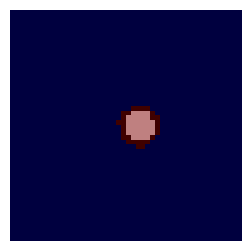

Class 1:
Jaccard Index: 0.5072
True positives %: 100%
False positives: 0.0


In [6]:
segmentation_tests(test_dataset_C, outputs_C)

### Ellipse particle

In [4]:
lodestar2_E = LodeSTAR(num_classes=1, n_transforms=2).build()
lodestar2_E = clip_grad_training(lodestar2_E, train_dataloader_E, 
                                           num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

lodestar2_E.eval()

NameError: name 'LodeSTAR' is not defined

In [ ]:
outputs_E = []
for batch in test_dataloader_E:
    data, part1, pos1 = batch
    output = lodestar2_E((data)).detach()
    outputs_E.append(output)

outputs_E = torch.cat(outputs_E, dim=0)

segmentation_tests(test_dataset_E, outputs_E)

### Moon particle

In [ ]:
lodestar2_M = LodeSTAR(num_classes=1, n_transforms=2).build()
lodestar2_M = clip_grad_training(lodestar2_M, train_dataloader_M, 
                                           num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

lodestar2_M.plot_losses()
lodestar2_M.eval()

In [ ]:
outputs_M = []
for batch in test_dataloader_M:
    data, part1, pos1 = batch
    output = lodestar2_M((data)).detach()
    outputs_M.append(output)

outputs_M = torch.cat(outputs_M, dim=0)

segmentation_tests(test_dataset_M, outputs_M)

### Star particle

In [ ]:
lodestar2_S = LodeSTAR(num_classes=1, n_transforms=2).build()
lodestar2_S = clip_grad_training(lodestar2_S, train_dataloader_S, 
                                           num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

lodestar2_S.plot_losses()
lodestar2_S.eval()

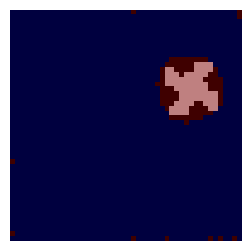

Class 1:
Jaccard Index: 0.4585
True positives %: 100%
False positives: 5.37


In [11]:
outputs_S = []
for batch in test_dataloader_S:
    data, part1, pos1 = batch
    output = lodestar2_S((data)).detach()
    outputs_S.append(output)

outputs_S = torch.cat(outputs_S, dim=0)

segmentation_tests(test_dataset_S, outputs_S)

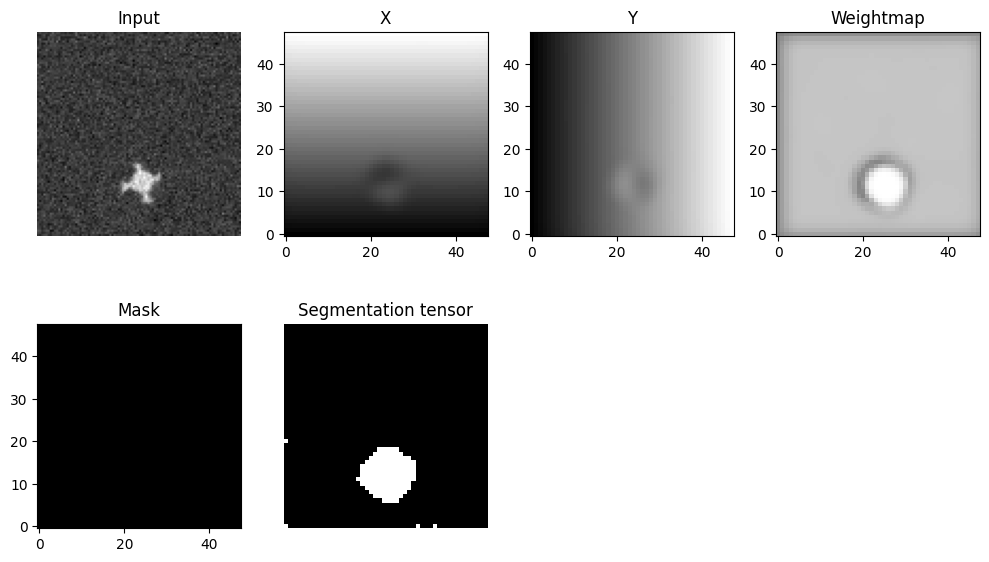

In [40]:
data, *_ = next(iter(test_dataloader_S))
output = lodestar2_S((data)).detach()
import matplotlib.pyplot as plt

x = 5

plt.figure(figsize=(10, 6))
for i in range(6):
	plt.subplot(2, 4, i + 1)
	if i==0:
		plt.imshow(data[x,...].squeeze(), cmap="gray", origin="lower")
		plt.title('Input')
		plt.axis('off')
	elif i==1:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower")
		plt.title('X')
	elif i==2:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower")
		plt.title('Y')
	elif i==3:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower", vmin=0,vmax=1)
		plt.title('Weightmap')
	elif i==4:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower")
		plt.title('Mask')
	else:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower", vmin=0,vmax=1)
		if i < 7:
			plt.title('Segmentation tensor')
		else:
			plt.title('Background')
plt.tight_layout()
plt.axis('off')
plt.show()

### Filament shape

In [ ]:
lodestar2_F = LodeSTAR(num_classes=1, n_transforms=2).build()
lodestar2_F = clip_grad_training(lodestar2_F, train_dataloader_F, 
                                           num_epochs=50, initial_lr=2e-3, patience=10, best_model=False, clip_grad=False)

lodestar2_F.plot_losses()
lodestar2_F.eval()

In [ ]:
outputs_F = []
for batch in test_dataloader_F:
    data, part1, pos1 = batch
    output = lodestar2_F((data)).detach()
    outputs_F.append(output)

outputs_F = torch.cat(outputs_F, dim=0)

segmentation_tests(test_dataset_F, outputs_F)

### Square shape

In [ ]:
lodestar2_Sq = LodeSTAR(num_classes=1, n_transforms=2).build()
lodestar2_Sq = clip_grad_training(lodestar2_Sq, train_dataloader_Sq, 
                                           num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

lodestar2_Sq.plot_losses()
lodestar2_Sq.eval()

In [ ]:
outputs_Sq = []
for batch in test_dataloader_Sq:
    data, part1, pos1 = batch
    output = lodestar2_Sq((data)).detach()
    outputs_Sq.append(output)

outputs_Sq = torch.cat(outputs_Sq, dim=0)

segmentation_tests(test_dataset_Sq, outputs_Sq)

## 2 classes

### CE

In [16]:
# import deeplay as dl

# lodestar2_CE = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# trainer_lodestar_CE = dl.Trainer(max_epochs=50, accelerator='cpu')
# trainer_lodestar_CE.fit(lodestar2_CE, train_dataloader_CE)

torch.save(lodestar2_CE.state_dict(), "models/lodestar2_CE_C.pth")

# lodestar2_CE = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# lodestar2_CE.load_state_dict(torch.load('models/lodestar2_CE.pth'))
# lodestar2_CE.eval()

Epoch 1/39: 100%|██████████| 25/25 [00:00<00:00, 26.78it/s, loss=2.88]


Epoch 1/39, Learning Rate: 0.004500, Average Loss: 53.2895
  between_image_disagreement: 0.5267
  within_image_disagreement: 0.3095
  mask_loss: 1.4001


Epoch 2/39: 100%|██████████| 25/25 [00:00<00:00, 26.05it/s, loss=2.99]


Epoch 2/39, Learning Rate: 0.004050, Average Loss: 3.1895
  between_image_disagreement: 0.8203
  within_image_disagreement: 0.3389
  mask_loss: 1.0400


Epoch 3/39: 100%|██████████| 25/25 [00:00<00:00, 28.93it/s, loss=3.09]


Epoch 3/39, Learning Rate: 0.003645, Average Loss: 3.1404
  between_image_disagreement: 0.9171
  within_image_disagreement: 0.3247
  mask_loss: 1.0205


Epoch 4/39: 100%|██████████| 25/25 [00:00<00:00, 29.59it/s, loss=2.66]


Epoch 4/39, Learning Rate: 0.003281, Average Loss: 2.9390
  between_image_disagreement: 0.7725
  within_image_disagreement: 0.3185
  mask_loss: 0.6970


Epoch 5/39: 100%|██████████| 25/25 [00:00<00:00, 29.41it/s, loss=2.65]


Epoch 5/39, Learning Rate: 0.002952, Average Loss: 2.9532
  between_image_disagreement: 0.7542
  within_image_disagreement: 0.3343
  mask_loss: 0.7251


Epoch 6/39: 100%|██████████| 25/25 [00:00<00:00, 28.91it/s, loss=2.78]


Epoch 6/39, Learning Rate: 0.002657, Average Loss: 2.9890
  between_image_disagreement: 0.8098
  within_image_disagreement: 0.3250
  mask_loss: 0.8276


Epoch 7/39: 100%|██████████| 25/25 [00:00<00:00, 28.79it/s, loss=2.88]


Epoch 7/39, Learning Rate: 0.002391, Average Loss: 2.8700
  between_image_disagreement: 1.0253
  within_image_disagreement: 0.3152
  mask_loss: 0.6897


Epoch 8/39: 100%|██████████| 25/25 [00:00<00:00, 29.53it/s, loss=2.76]


Epoch 8/39, Learning Rate: 0.002152, Average Loss: 2.9387
  between_image_disagreement: 0.7442
  within_image_disagreement: 0.2999
  mask_loss: 0.8765


Epoch 9/39: 100%|██████████| 25/25 [00:00<00:00, 29.36it/s, loss=2.65]


Epoch 9/39, Learning Rate: 0.001937, Average Loss: 2.7606
  between_image_disagreement: 0.7186
  within_image_disagreement: 0.2804
  mask_loss: 0.8289


Epoch 10/39: 100%|██████████| 25/25 [00:00<00:00, 28.69it/s, loss=2.05]


Epoch 10/39, Learning Rate: 0.001743, Average Loss: 2.3713
  between_image_disagreement: 0.6823
  within_image_disagreement: 0.2843
  mask_loss: 0.2991


Epoch 11/39: 100%|██████████| 25/25 [00:00<00:00, 29.46it/s, loss=2.02]


Epoch 11/39, Learning Rate: 0.001569, Average Loss: 2.0800
  between_image_disagreement: 0.4838
  within_image_disagreement: 0.2174
  mask_loss: 0.7349


Epoch 12/39: 100%|██████████| 25/25 [00:00<00:00, 28.99it/s, loss=2.14]


Epoch 12/39, Learning Rate: 0.001412, Average Loss: 1.9649
  between_image_disagreement: 0.9915
  within_image_disagreement: 0.3186
  mask_loss: 0.0378


Epoch 13/39: 100%|██████████| 25/25 [00:00<00:00, 29.29it/s, loss=1.83]


Epoch 13/39, Learning Rate: 0.001271, Average Loss: 1.7962
  between_image_disagreement: 0.6382
  within_image_disagreement: 0.2368
  mask_loss: 0.3870


Epoch 14/39: 100%|██████████| 25/25 [00:00<00:00, 28.14it/s, loss=2.1] 


Epoch 14/39, Learning Rate: 0.001144, Average Loss: 1.7268
  between_image_disagreement: 0.9762
  within_image_disagreement: 0.2404
  mask_loss: 0.2856


Epoch 15/39: 100%|██████████| 25/25 [00:00<00:00, 29.44it/s, loss=1.53]


Epoch 15/39, Learning Rate: 0.001029, Average Loss: 1.6262
  between_image_disagreement: 0.4820
  within_image_disagreement: 0.2384
  mask_loss: 0.2698


Epoch 16/39: 100%|██████████| 25/25 [00:00<00:00, 29.97it/s, loss=1.56]


Epoch 16/39, Learning Rate: 0.000927, Average Loss: 1.5808
  between_image_disagreement: 0.5969
  within_image_disagreement: 0.2645
  mask_loss: 0.1453


Epoch 17/39: 100%|██████████| 25/25 [00:00<00:00, 28.79it/s, loss=1.35]


Epoch 17/39, Learning Rate: 0.000834, Average Loss: 1.5114
  between_image_disagreement: 0.3765
  within_image_disagreement: 0.1881
  mask_loss: 0.3992


Epoch 18/39: 100%|██████████| 25/25 [00:00<00:00, 29.22it/s, loss=1.31]


Epoch 18/39, Learning Rate: 0.000750, Average Loss: 1.4433
  between_image_disagreement: 0.4106
  within_image_disagreement: 0.2251
  mask_loss: 0.2783


Epoch 19/39: 100%|██████████| 25/25 [00:00<00:00, 28.37it/s, loss=1.5] 


Epoch 19/39, Learning Rate: 0.000675, Average Loss: 1.4699
  between_image_disagreement: 0.6697
  within_image_disagreement: 0.2299
  mask_loss: 0.1868


Epoch 20/39: 100%|██████████| 25/25 [00:00<00:00, 28.63it/s, loss=1.51]


Epoch 20/39, Learning Rate: 0.000608, Average Loss: 1.4073
  between_image_disagreement: 0.6496
  within_image_disagreement: 0.2182
  mask_loss: 0.2808


Epoch 21/39: 100%|██████████| 25/25 [00:00<00:00, 27.70it/s, loss=1.63]


Epoch 21/39, Learning Rate: 0.000547, Average Loss: 1.4069
  between_image_disagreement: 0.9020
  within_image_disagreement: 0.2333
  mask_loss: 0.1636


Epoch 22/39: 100%|██████████| 25/25 [00:00<00:00, 28.29it/s, loss=1.46]


Epoch 22/39, Learning Rate: 0.000492, Average Loss: 1.3183
  between_image_disagreement: 0.6628
  within_image_disagreement: 0.2114
  mask_loss: 0.2673


Epoch 23/39: 100%|██████████| 25/25 [00:00<00:00, 26.15it/s, loss=1.32]


Epoch 23/39, Learning Rate: 0.000443, Average Loss: 1.2744
  between_image_disagreement: 0.6359
  within_image_disagreement: 0.2113
  mask_loss: 0.2234


Epoch 24/39: 100%|██████████| 25/25 [00:00<00:00, 25.55it/s, loss=1.36]


Epoch 24/39, Learning Rate: 0.000399, Average Loss: 1.3110
  between_image_disagreement: 0.5572
  within_image_disagreement: 0.1923
  mask_loss: 0.3162


Epoch 25/39: 100%|██████████| 25/25 [00:00<00:00, 27.59it/s, loss=1.09] 


Epoch 25/39, Learning Rate: 0.000359, Average Loss: 1.2007
  between_image_disagreement: 0.2764
  within_image_disagreement: 0.1792
  mask_loss: 0.3625


Epoch 26/39: 100%|██████████| 25/25 [00:00<00:00, 25.11it/s, loss=1.16] 


Epoch 26/39, Learning Rate: 0.000323, Average Loss: 1.1784
  between_image_disagreement: 0.3366
  within_image_disagreement: 0.1821
  mask_loss: 0.3870


Epoch 27/39: 100%|██████████| 25/25 [00:00<00:00, 26.62it/s, loss=1.14] 


Epoch 27/39, Learning Rate: 0.000291, Average Loss: 1.1293
  between_image_disagreement: 0.5432
  within_image_disagreement: 0.2141
  mask_loss: 0.0403


Epoch 28/39: 100%|██████████| 25/25 [00:00<00:00, 27.12it/s, loss=1.04] 


Epoch 28/39, Learning Rate: 0.000262, Average Loss: 1.1522
  between_image_disagreement: 0.3751
  within_image_disagreement: 0.1899
  mask_loss: 0.0732


Epoch 29/39: 100%|██████████| 25/25 [00:00<00:00, 26.64it/s, loss=0.984]


Epoch 29/39, Learning Rate: 0.000236, Average Loss: 1.1131
  between_image_disagreement: 0.3480
  within_image_disagreement: 0.1531
  mask_loss: 0.1904


Epoch 30/39: 100%|██████████| 25/25 [00:00<00:00, 25.34it/s, loss=1.16] 


Epoch 30/39, Learning Rate: 0.000212, Average Loss: 1.0049
  between_image_disagreement: 0.4407
  within_image_disagreement: 0.1655
  mask_loss: 0.0208


Epoch 31/39: 100%|██████████| 25/25 [00:00<00:00, 25.53it/s, loss=1.01] 


Epoch 31/39, Learning Rate: 0.000191, Average Loss: 0.9700
  between_image_disagreement: 0.2407
  within_image_disagreement: 0.1459
  mask_loss: 0.0110


Epoch 32/39: 100%|██████████| 25/25 [00:00<00:00, 26.39it/s, loss=0.856]


Epoch 32/39, Learning Rate: 0.000172, Average Loss: 0.9122
  between_image_disagreement: 0.2477
  within_image_disagreement: 0.1271
  mask_loss: 0.0110


Epoch 33/39: 100%|██████████| 25/25 [00:00<00:00, 26.49it/s, loss=0.824]


Epoch 33/39, Learning Rate: 0.000155, Average Loss: 0.8871
  between_image_disagreement: 0.2123
  within_image_disagreement: 0.1396
  mask_loss: 0.0317


Epoch 34/39: 100%|██████████| 25/25 [00:00<00:00, 27.15it/s, loss=0.909]


Epoch 34/39, Learning Rate: 0.000139, Average Loss: 0.8563
  between_image_disagreement: 0.2265
  within_image_disagreement: 0.1172
  mask_loss: 0.0061


Epoch 35/39: 100%|██████████| 25/25 [00:01<00:00, 24.37it/s, loss=0.684]


Epoch 35/39, Learning Rate: 0.000125, Average Loss: 0.8330
  between_image_disagreement: 0.1763
  within_image_disagreement: 0.1281
  mask_loss: 0.0122


Epoch 36/39: 100%|██████████| 25/25 [00:01<00:00, 24.27it/s, loss=0.894]


Epoch 36/39, Learning Rate: 0.000113, Average Loss: 0.8047
  between_image_disagreement: 0.2964
  within_image_disagreement: 0.1260
  mask_loss: 0.0317


Epoch 37/39: 100%|██████████| 25/25 [00:00<00:00, 25.58it/s, loss=0.757]


Epoch 37/39, Learning Rate: 0.000101, Average Loss: 0.8055
  between_image_disagreement: 0.2316
  within_image_disagreement: 0.1237
  mask_loss: 0.0134


Epoch 38/39: 100%|██████████| 25/25 [00:01<00:00, 20.87it/s, loss=0.769]


Epoch 38/39, Learning Rate: 0.000091, Average Loss: 0.8014
  between_image_disagreement: 0.1445
  within_image_disagreement: 0.1158
  mask_loss: 0.0037


Epoch 39/39: 100%|██████████| 25/25 [00:00<00:00, 25.33it/s, loss=0.796]


Epoch 39/39, Learning Rate: 0.000082, Average Loss: 0.7860
  between_image_disagreement: 0.2147
  within_image_disagreement: 0.1107
  mask_loss: 0.0061


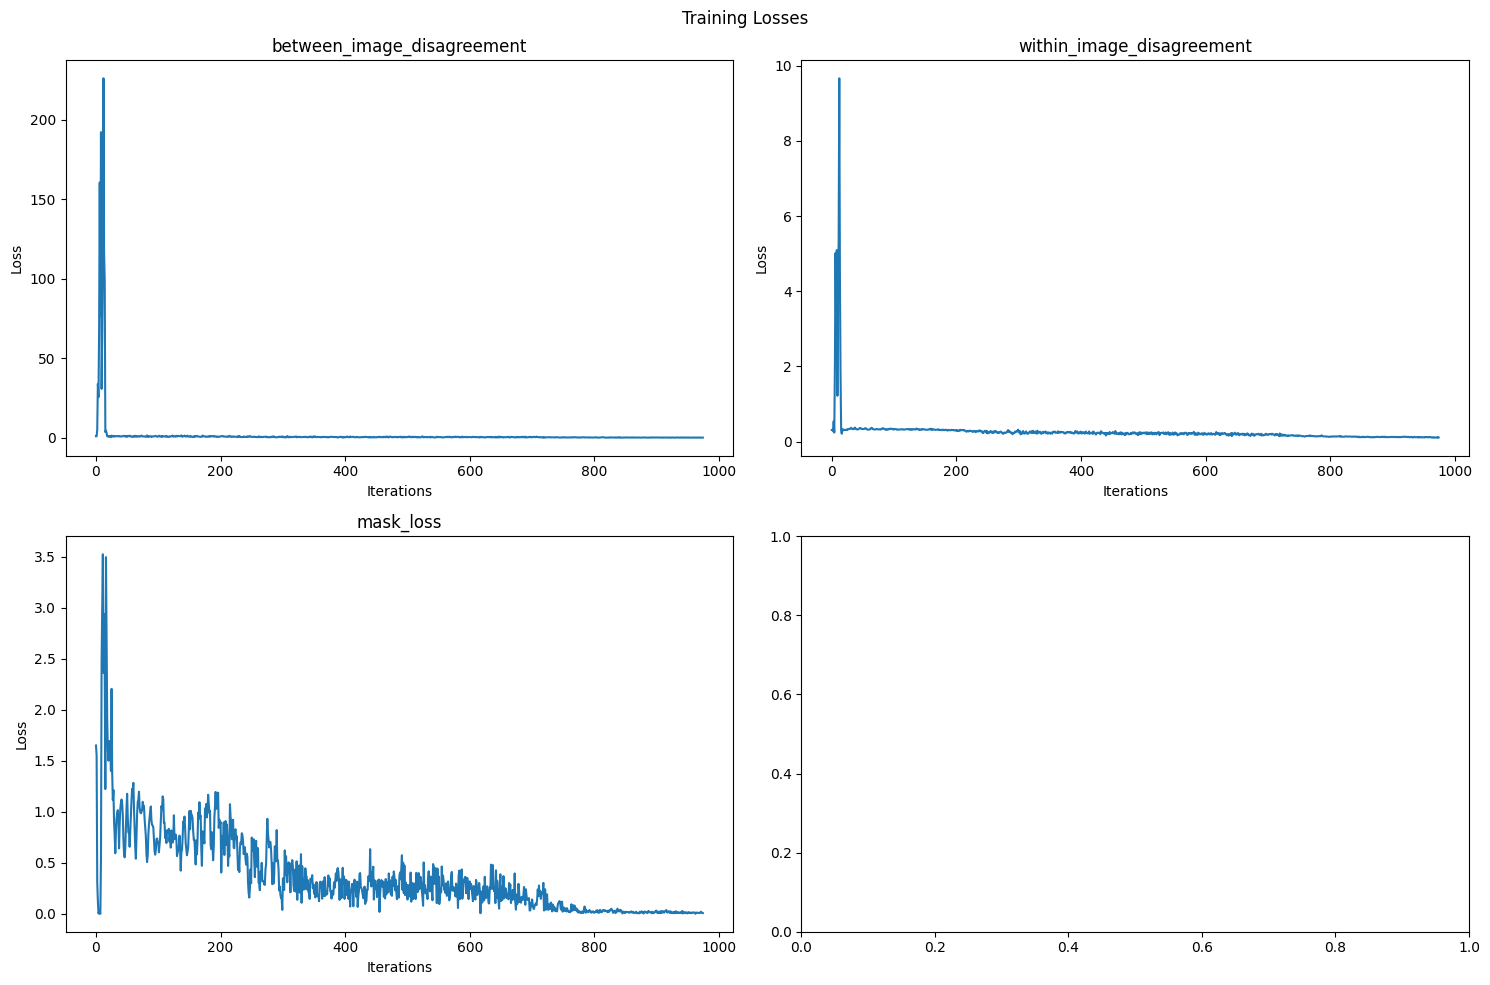

In [14]:
lodestar2_CE = LodeSTAR(num_classes=2, n_transforms=2).build()
lodestar2_CE = clip_grad_training(lodestar2_CE, train_dataloader_CE, 
                                           num_epochs=39, initial_lr=5e-3, patience=10, best_model=False, clip_grad=False)

lodestar2_CE.plot_losses()

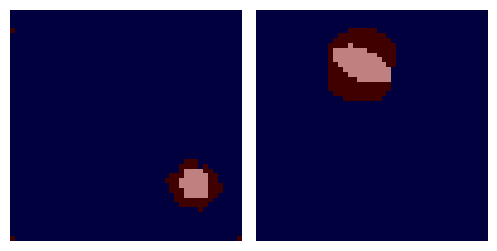

Class 1:
Jaccard Index: 0.3389
True positives %: 99%
False positives: 3.14
Class 2:
Jaccard Index: 0.3634
True positives %: 99%
False positives: 0.2


In [15]:
lodestar2_CE.eval()

outputs_CE = []
for batch in test_dataloader_CE:
    data, *_ = batch
    output = lodestar2_CE((data)).detach()
    outputs_CE.append(output)

outputs_CE = torch.cat(outputs_CE, dim=0)

segmentation_tests(test_dataset_CE, outputs_CE)

### CM

In [ ]:
import deeplay as dl

# lodestar2_CM = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# trainer_lodestar_CM = dl.Trainer(max_epochs=100, accelerator='cpu')
# trainer_lodestar_CM.fit(lodestar2_CM, train_dataloader_CM)

# torch.save(lodestar2_CM.state_dict(), "models/lodestar2_CM.pth")

lodestar2_CM = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
lodestar2_CM.load_state_dict(torch.load('models/lodestar2_CM.pth'))
lodestar2_CM.eval()

In [ ]:
# lodestar2_CM = LodeSTAR(num_classes=2, n_transforms=2).build()
# lodestar2_CM = clip_grad_training(lodestar2_CM, train_dataloader_CM, 
#                                            num_epochs=50, initial_lr=1e-3, patience=10, gamma =0.9, best_model=False, clip_grad=False)

# lodestar2_CM.plot_losses()

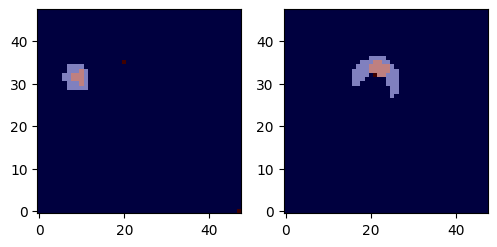

Class 1:
Jaccard Index: 0.2707
True positives %: 92%
False positives: 1.15
Class 2:
Jaccard Index: 0.2400
True positives %: 97%
False positives: 0.07


In [ ]:
outputs_CM = []
for batch in test_dataloader_CM:
    data, *_ = batch
    output = lodestar2_CM((data)).detach()
    outputs_CM.append(output)

outputs_CM = torch.cat(outputs_CM, dim=0)

segmentation_tests(test_dataset_CM, outputs_CM)

### CS

In [ ]:
import deeplay as dl

# lodestar2_CS = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# trainer_lodestar_CS = dl.Trainer(max_epochs=100, accelerator='cpu')
# trainer_lodestar_CS.fit(lodestar2_CS, train_dataloader_CS)

# torch.save(lodestar2_CS.state_dict(), "models/lodestar2_CS.pth")

lodestar2_CS = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
lodestar2_CS.load_state_dict(torch.load('models/lodestar2_CS.pth'))
lodestar2_CS.eval()

In [ ]:
# lodestar2_CS = LodeSTAR(num_classes=2, n_transforms=2).build()
# lodestar2_CS = clip_grad_training(lodestar2_CS, train_dataloader_CS, 
#                                            num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

# lodestar2_CS.plot_losses()

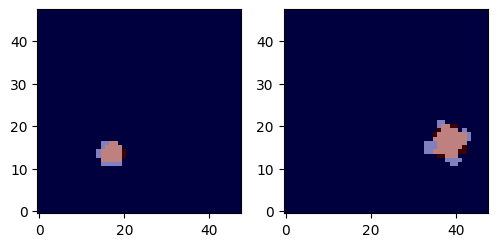

Class 1:
Jaccard Index: 0.6732
True positives %: 95%
False positives: 0.04
Class 2:
Jaccard Index: 0.5342
True positives %: 99%
False positives: 0.13


In [ ]:
outputs_CS = []
for batch in test_dataloader_CS:
    data, *_ = batch
    output = lodestar2_CS((data)).detach()
    outputs_CS.append(output)

outputs_CS = torch.cat(outputs_CS, dim=0)

segmentation_tests(test_dataset_CS, outputs_CS)

### CF

In [ ]:
import deeplay as dl

# lodestar2_CF = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# trainer_lodestar_CF = dl.Trainer(max_epochs=100, accelerator='cpu')
# trainer_lodestar_CF.fit(lodestar2_CF, train_dataloader_CF)

# torch.save(lodestar2_CF.state_dict(), "models/lodestar2_CF.pth")

lodestar2_CF = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
lodestar2_CF.load_state_dict(torch.load('models/lodestar2_CF.pth'))
lodestar2_CF.eval()

In [ ]:
# lodestar2_CF = LodeSTAR(num_classes=2, n_transforms=2).build()
# lodestar2_CF = clip_grad_training(lodestar2_CF, train_dataloader_CF, 
#                                            num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

# lodestar2_CF.plot_losses()

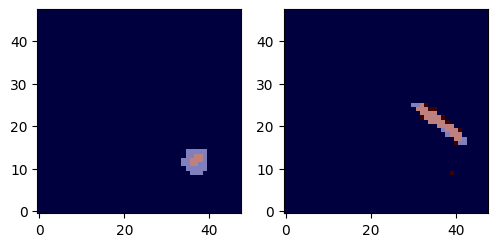

Class 1:
Jaccard Index: 0.2173
True positives %: 97%
False positives: 0.03
Class 2:
Jaccard Index: 0.6546
True positives %: 100%
False positives: 0.57


In [ ]:
outputs_CF = []
for batch in test_dataloader_CF:
    data, *_ = batch
    output = lodestar2_CF((data)).detach()
    outputs_CF.append(output)

outputs_CF = torch.cat(outputs_CF, dim=0)

segmentation_tests(test_dataset_CF, outputs_CF)

### CSq

In [ ]:
import deeplay as dl

# lodestar2_CSq = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# trainer_lodestar_CSq = dl.Trainer(max_epochs=100, accelerator='cpu')
# trainer_lodestar_CSq.fit(lodestar2_CSq, train_dataloader_CSq)

# torch.save(lodestar2_CSq.state_dict(), "models/lodestar2_CSq.pth")

lodestar2_CSq = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
lodestar2_CSq.load_state_dict(torch.load('models/lodestar2_CSq.pth'))
lodestar2_CSq.eval()

In [ ]:
# lodestar2_CSq = LodeSTAR(num_classes=2, n_transforms=2).build()
# lodestar2_CSq = clip_grad_training(lodestar2_CSq, train_dataloader_CSq, 
#                                            num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

# lodestar2_CSq.plot_losses()# from clip_grad_tr

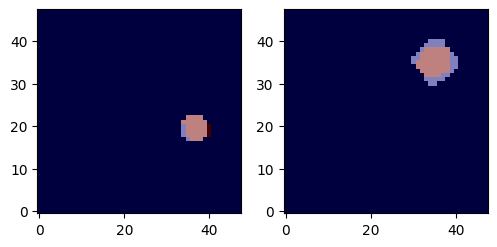

Class 1:
Jaccard Index: 0.6903
True positives %: 91%
False positives: 0.15
Class 2:
Jaccard Index: 0.5819
True positives %: 100%
False positives: 0.1


In [ ]:
outputs_CSq = []
for batch in test_dataloader_CSq:
    data, *_ = batch
    output = lodestar2_CSq((data)).detach()
    outputs_CSq.append(output)

outputs_CSq = torch.cat(outputs_CSq, dim=0)

segmentation_tests(test_dataset_CSq, outputs_CSq)

### ESq

In [ ]:
import deeplay as dl

lodestar2_ESq = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
trainer_lodestar_ESq = dl.Trainer(max_epochs=100, accelerator='cpu')
trainer_lodestar_ESq.fit(lodestar2_ESq, train_dataloader_ESq)

# torch.save(lodestar2_ESq.state_dict(), "models/lodestar2_ESq.pth")

# lodestar2_ESq = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# lodestar2_ESq.load_state_dict(torch.load('models/lodestar2_ESq.pth'))
# lodestar2_ESq.eval()

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type                       ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model         │ ConvolutionalNeuralNetwork │  252 K │
│ 1 │ between_loss  │ L1Loss                     │      0 │
│ 2 │ within_loss   │ L1Loss                     │      0 │
│ 3 │ train_metrics │ MetricCollection           │      0 │
│ 4 │ val_metrics   │ MetricCollection           │      0 │
│ 5 │ test_metrics  │ MetricCollection           │      0 │
│ 6 │ optimizer     │ Adam                       │      0 │
└───┴───────────────┴────────────────────────────┴────────┘

Trainable params: 252 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 252 K                                                                                                
Total estimated model params size (MB): 1

Output()

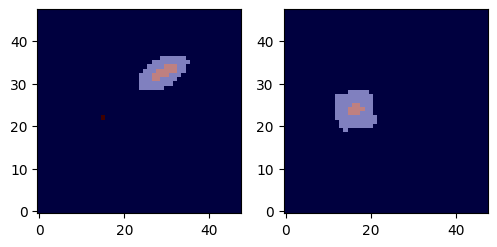

Class 1:
Jaccard Index: 0.1655
True positives %: 98%
False positives: 0.16
Class 2:
Jaccard Index: 0.1157
True positives %: 98%
False positives: 0.01


In [ ]:
from segmentation_tests import segmentation_tests

outputs_ESq = []
for batch in test_dataloader_ESq:
    data, *_ = batch
    output = lodestar2_ESq((data)).detach()
    outputs_ESq.append(output)

outputs_ESq = torch.cat(outputs_ESq, dim=0)

segmentation_tests(test_dataset_ESq, outputs_ESq)

## 3 particles

### CEM

In [25]:
# import deeplay as dl

# lodestar2_CEM = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3, n_transforms=4).build()
# trainer_lodestar_CEM = dl.Trainer(max_epochs=50, accelerator='cpu')
# trainer_lodestar_CEM.fit(lodestar2_CEM, train_dataloader_CEM)

# torch.save(lodestar2_CEM.state_dict(), "models/lodestar2_CEM.pth")

lodestar2_CEM = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3).build()
lodestar2_CEM.load_state_dict(torch.load('models/lodestar2_CEM.pth'))
lodestar2_CEM.eval()

Epoch 1/50: 100%|██████████| 38/38 [00:04<00:00,  8.81it/s, loss=2.26]


Epoch 1/50, Learning Rate: 0.000900, Average Loss: 2.6495
  between_image_disagreement: 0.9211
  within_image_disagreement: 0.3204
  mask_loss: 1.0156


Epoch 2/50: 100%|██████████| 38/38 [00:03<00:00,  9.59it/s, loss=2.16]


Epoch 2/50, Learning Rate: 0.000810, Average Loss: 2.4860
  between_image_disagreement: 0.8018
  within_image_disagreement: 0.3121
  mask_loss: 1.0430


Epoch 3/50: 100%|██████████| 38/38 [00:03<00:00, 10.38it/s, loss=2.32]


Epoch 3/50, Learning Rate: 0.000729, Average Loss: 2.1826
  between_image_disagreement: 1.2430
  within_image_disagreement: 0.2648
  mask_loss: 0.8145


Epoch 4/50: 100%|██████████| 38/38 [00:03<00:00, 10.07it/s, loss=2.31]


Epoch 4/50, Learning Rate: 0.000656, Average Loss: 1.9265
  between_image_disagreement: 0.9183
  within_image_disagreement: 0.2856
  mask_loss: 1.1094


Epoch 5/50: 100%|██████████| 38/38 [00:03<00:00,  9.96it/s, loss=1.98]


Epoch 5/50, Learning Rate: 0.000590, Average Loss: 1.9956
  between_image_disagreement: 0.9257
  within_image_disagreement: 0.2605
  mask_loss: 0.7930


Epoch 6/50: 100%|██████████| 38/38 [00:03<00:00, 10.01it/s, loss=1.45]


Epoch 6/50, Learning Rate: 0.000531, Average Loss: 1.8817
  between_image_disagreement: 0.6428
  within_image_disagreement: 0.1777
  mask_loss: 0.6309


Epoch 7/50: 100%|██████████| 38/38 [00:04<00:00,  9.35it/s, loss=2.16]


Epoch 7/50, Learning Rate: 0.000478, Average Loss: 1.8192
  between_image_disagreement: 1.1651
  within_image_disagreement: 0.2585
  mask_loss: 0.7344


Epoch 8/50: 100%|██████████| 38/38 [00:04<00:00,  9.49it/s, loss=1.21]


Epoch 8/50, Learning Rate: 0.000430, Average Loss: 1.6225
  between_image_disagreement: 0.6212
  within_image_disagreement: 0.2224
  mask_loss: 0.3633


Epoch 9/50: 100%|██████████| 38/38 [00:04<00:00,  9.33it/s, loss=1.59]


Epoch 9/50, Learning Rate: 0.000387, Average Loss: 1.6406
  between_image_disagreement: 0.7760
  within_image_disagreement: 0.1958
  mask_loss: 0.6230


Epoch 10/50: 100%|██████████| 38/38 [00:03<00:00,  9.56it/s, loss=1.69]


Epoch 10/50, Learning Rate: 0.000349, Average Loss: 1.5253
  between_image_disagreement: 0.8078
  within_image_disagreement: 0.2454
  mask_loss: 0.6387


Epoch 11/50: 100%|██████████| 38/38 [00:04<00:00,  9.23it/s, loss=1.42]


Epoch 11/50, Learning Rate: 0.000314, Average Loss: 1.5604
  between_image_disagreement: 0.7214
  within_image_disagreement: 0.1819
  mask_loss: 0.5156


Epoch 12/50: 100%|██████████| 38/38 [00:04<00:00,  9.23it/s, loss=1.36]


Epoch 12/50, Learning Rate: 0.000282, Average Loss: 1.3884
  between_image_disagreement: 0.4970
  within_image_disagreement: 0.1700
  mask_loss: 0.6934


Epoch 13/50: 100%|██████████| 38/38 [00:03<00:00,  9.53it/s, loss=0.937]


Epoch 13/50, Learning Rate: 0.000254, Average Loss: 1.2802
  between_image_disagreement: 0.5196
  within_image_disagreement: 0.1611
  mask_loss: 0.2559


Epoch 14/50: 100%|██████████| 38/38 [00:03<00:00,  9.62it/s, loss=1.44] 


Epoch 14/50, Learning Rate: 0.000229, Average Loss: 1.2337
  between_image_disagreement: 0.8918
  within_image_disagreement: 0.1081
  mask_loss: 0.4355


Epoch 15/50: 100%|██████████| 38/38 [00:04<00:00,  9.25it/s, loss=0.814]


Epoch 15/50, Learning Rate: 0.000206, Average Loss: 1.0408
  between_image_disagreement: 0.4324
  within_image_disagreement: 0.1489
  mask_loss: 0.2324


Epoch 16/50: 100%|██████████| 38/38 [00:04<00:00,  9.24it/s, loss=0.693]


Epoch 16/50, Learning Rate: 0.000185, Average Loss: 0.9485
  between_image_disagreement: 0.2975
  within_image_disagreement: 0.1141
  mask_loss: 0.2812


Epoch 17/50: 100%|██████████| 38/38 [00:04<00:00,  9.35it/s, loss=1.01] 


Epoch 17/50, Learning Rate: 0.000167, Average Loss: 0.8712
  between_image_disagreement: 0.6270
  within_image_disagreement: 0.0543
  mask_loss: 0.3320


Epoch 18/50: 100%|██████████| 38/38 [00:04<00:00,  9.14it/s, loss=0.788]


Epoch 18/50, Learning Rate: 0.000150, Average Loss: 0.8439
  between_image_disagreement: 0.4350
  within_image_disagreement: 0.0974
  mask_loss: 0.2559


Epoch 19/50: 100%|██████████| 38/38 [00:04<00:00,  9.17it/s, loss=0.712]


Epoch 19/50, Learning Rate: 0.000135, Average Loss: 0.7107
  between_image_disagreement: 0.3851
  within_image_disagreement: 0.0867
  mask_loss: 0.2402


Epoch 20/50: 100%|██████████| 38/38 [00:04<00:00,  8.72it/s, loss=0.435]


Epoch 20/50, Learning Rate: 0.000122, Average Loss: 0.6560
  between_image_disagreement: 0.1535
  within_image_disagreement: 0.0469
  mask_loss: 0.2344


Epoch 21/50: 100%|██████████| 38/38 [00:04<00:00,  8.94it/s, loss=0.824]


Epoch 21/50, Learning Rate: 0.000109, Average Loss: 0.6504
  between_image_disagreement: 0.6192
  within_image_disagreement: 0.1228
  mask_loss: 0.0820


Epoch 22/50: 100%|██████████| 38/38 [00:04<00:00,  8.67it/s, loss=0.699]


Epoch 22/50, Learning Rate: 0.000098, Average Loss: 0.5746
  between_image_disagreement: 0.5295
  within_image_disagreement: 0.1086
  mask_loss: 0.0605


Epoch 23/50: 100%|██████████| 38/38 [00:04<00:00,  8.87it/s, loss=0.447]


Epoch 23/50, Learning Rate: 0.000089, Average Loss: 0.5596
  between_image_disagreement: 0.2944
  within_image_disagreement: 0.0707
  mask_loss: 0.0820


Epoch 24/50: 100%|██████████| 38/38 [00:04<00:00,  8.58it/s, loss=0.389]


Epoch 24/50, Learning Rate: 0.000080, Average Loss: 0.5234
  between_image_disagreement: 0.2252
  within_image_disagreement: 0.0754
  mask_loss: 0.0879


Epoch 25/50: 100%|██████████| 38/38 [00:04<00:00,  8.90it/s, loss=0.485]


Epoch 25/50, Learning Rate: 0.000072, Average Loss: 0.4754
  between_image_disagreement: 0.3392
  within_image_disagreement: 0.0555
  mask_loss: 0.0898


Epoch 26/50: 100%|██████████| 38/38 [00:04<00:00,  8.64it/s, loss=0.885]


Epoch 26/50, Learning Rate: 0.000065, Average Loss: 0.4617
  between_image_disagreement: 0.7673
  within_image_disagreement: 0.1177
  mask_loss: 0.0000


Epoch 27/50: 100%|██████████| 38/38 [00:04<00:00,  8.79it/s, loss=0.637]


Epoch 27/50, Learning Rate: 0.000058, Average Loss: 0.4074
  between_image_disagreement: 0.5227
  within_image_disagreement: 0.0655
  mask_loss: 0.0488


Epoch 28/50: 100%|██████████| 38/38 [00:04<00:00,  8.76it/s, loss=0.302]


Epoch 28/50, Learning Rate: 0.000052, Average Loss: 0.4061
  between_image_disagreement: 0.1520
  within_image_disagreement: 0.0874
  mask_loss: 0.0625


Epoch 29/50: 100%|██████████| 38/38 [00:04<00:00,  8.81it/s, loss=0.262]


Epoch 29/50, Learning Rate: 0.000047, Average Loss: 0.3688
  between_image_disagreement: 0.1502
  within_image_disagreement: 0.0634
  mask_loss: 0.0488


Epoch 30/50: 100%|██████████| 38/38 [00:04<00:00,  8.66it/s, loss=0.444]


Epoch 30/50, Learning Rate: 0.000042, Average Loss: 0.3544
  between_image_disagreement: 0.3344
  within_image_disagreement: 0.0730
  mask_loss: 0.0371


Epoch 31/50: 100%|██████████| 38/38 [00:04<00:00,  8.82it/s, loss=0.383]


Epoch 31/50, Learning Rate: 0.000038, Average Loss: 0.3592
  between_image_disagreement: 0.2954
  within_image_disagreement: 0.0527
  mask_loss: 0.0352


Epoch 32/50: 100%|██████████| 38/38 [00:04<00:00,  8.71it/s, loss=0.414]


Epoch 32/50, Learning Rate: 0.000034, Average Loss: 0.3174
  between_image_disagreement: 0.3363
  within_image_disagreement: 0.0681
  mask_loss: 0.0098


Epoch 33/50: 100%|██████████| 38/38 [00:04<00:00,  8.81it/s, loss=0.278]


Epoch 33/50, Learning Rate: 0.000031, Average Loss: 0.2868
  between_image_disagreement: 0.1993
  within_image_disagreement: 0.0611
  mask_loss: 0.0176


Epoch 34/50: 100%|██████████| 38/38 [00:04<00:00,  8.66it/s, loss=0.213]


Epoch 34/50, Learning Rate: 0.000028, Average Loss: 0.2935
  between_image_disagreement: 0.1482
  within_image_disagreement: 0.0338
  mask_loss: 0.0312


Epoch 35/50: 100%|██████████| 38/38 [00:04<00:00,  8.89it/s, loss=0.226]


Epoch 35/50, Learning Rate: 0.000025, Average Loss: 0.2717
  between_image_disagreement: 0.1763
  within_image_disagreement: 0.0323
  mask_loss: 0.0176


Epoch 36/50: 100%|██████████| 38/38 [00:04<00:00,  8.05it/s, loss=0.151]


Epoch 36/50, Learning Rate: 0.000023, Average Loss: 0.2564
  between_image_disagreement: 0.0846
  within_image_disagreement: 0.0569
  mask_loss: 0.0098


Epoch 37/50: 100%|██████████| 38/38 [00:04<00:00,  8.85it/s, loss=0.277]


Epoch 37/50, Learning Rate: 0.000020, Average Loss: 0.2473
  between_image_disagreement: 0.2026
  within_image_disagreement: 0.0573
  mask_loss: 0.0176


Epoch 38/50: 100%|██████████| 38/38 [00:04<00:00,  8.47it/s, loss=0.297]


Epoch 38/50, Learning Rate: 0.000018, Average Loss: 0.2563
  between_image_disagreement: 0.2407
  within_image_disagreement: 0.0444
  mask_loss: 0.0117


Epoch 39/50: 100%|██████████| 38/38 [00:05<00:00,  7.58it/s, loss=0.353]


Epoch 39/50, Learning Rate: 0.000016, Average Loss: 0.2202
  between_image_disagreement: 0.2738
  within_image_disagreement: 0.0481
  mask_loss: 0.0312


Epoch 40/50: 100%|██████████| 38/38 [00:04<00:00,  7.95it/s, loss=0.243]


Epoch 40/50, Learning Rate: 0.000015, Average Loss: 0.2243
  between_image_disagreement: 0.1935
  within_image_disagreement: 0.0381
  mask_loss: 0.0117


Epoch 41/50: 100%|██████████| 38/38 [00:04<00:00,  9.19it/s, loss=0.136]


Epoch 41/50, Learning Rate: 0.000013, Average Loss: 0.2081
  between_image_disagreement: 0.0808
  within_image_disagreement: 0.0322
  mask_loss: 0.0234


Epoch 42/50: 100%|██████████| 38/38 [00:04<00:00,  8.59it/s, loss=0.21] 


Epoch 42/50, Learning Rate: 0.000012, Average Loss: 0.2073
  between_image_disagreement: 0.1517
  within_image_disagreement: 0.0542
  mask_loss: 0.0039


Epoch 43/50: 100%|██████████| 38/38 [00:04<00:00,  8.69it/s, loss=0.211]


Epoch 43/50, Learning Rate: 0.000011, Average Loss: 0.2151
  between_image_disagreement: 0.1618
  within_image_disagreement: 0.0412
  mask_loss: 0.0078


Epoch 44/50: 100%|██████████| 38/38 [00:04<00:00,  8.60it/s, loss=0.124]


Epoch 44/50, Learning Rate: 0.000010, Average Loss: 0.2059
  between_image_disagreement: 0.0756
  within_image_disagreement: 0.0385
  mask_loss: 0.0098


Epoch 45/50: 100%|██████████| 38/38 [00:04<00:00,  8.75it/s, loss=0.23] 


Epoch 45/50, Learning Rate: 0.000009, Average Loss: 0.2059
  between_image_disagreement: 0.1823
  within_image_disagreement: 0.0435
  mask_loss: 0.0039


Epoch 46/50: 100%|██████████| 38/38 [00:04<00:00,  8.74it/s, loss=0.216]


Epoch 46/50, Learning Rate: 0.000008, Average Loss: 0.1874
  between_image_disagreement: 0.1572
  within_image_disagreement: 0.0544
  mask_loss: 0.0039


Epoch 47/50: 100%|██████████| 38/38 [00:04<00:00,  8.86it/s, loss=0.192]


Epoch 47/50, Learning Rate: 0.000007, Average Loss: 0.1989
  between_image_disagreement: 0.1497
  within_image_disagreement: 0.0422
  mask_loss: 0.0000


Epoch 48/50: 100%|██████████| 38/38 [00:04<00:00,  8.59it/s, loss=0.157]


Epoch 48/50, Learning Rate: 0.000006, Average Loss: 0.2038
  between_image_disagreement: 0.1091
  within_image_disagreement: 0.0437
  mask_loss: 0.0039


Epoch 49/50: 100%|██████████| 38/38 [00:04<00:00,  8.74it/s, loss=0.154]


Epoch 49/50, Learning Rate: 0.000006, Average Loss: 0.1912
  between_image_disagreement: 0.1135
  within_image_disagreement: 0.0328
  mask_loss: 0.0078


Epoch 50/50: 100%|██████████| 38/38 [00:04<00:00,  8.59it/s, loss=0.129]


Epoch 50/50, Learning Rate: 0.000005, Average Loss: 0.1869
  between_image_disagreement: 0.1023
  within_image_disagreement: 0.0206
  mask_loss: 0.0059


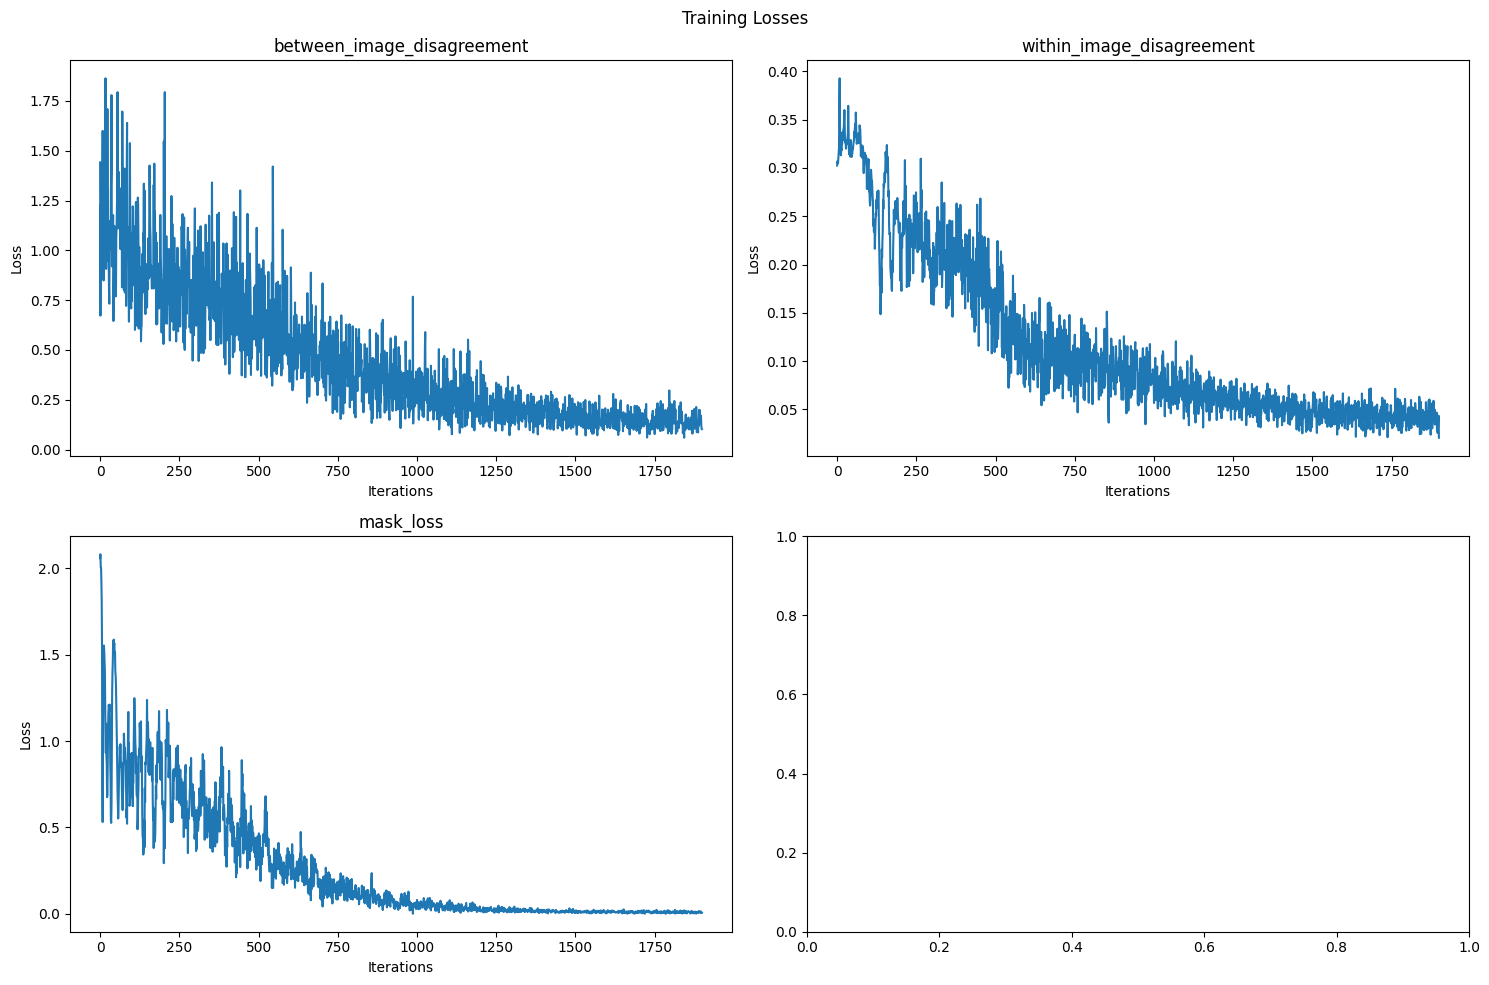

In [26]:
# lodestar2_CEM = LodeSTAR(num_classes=3, n_transforms=2).build()
# lodestar2_CEM = clip_grad_training(lodestar2_CEM, train_dataloader_CEM, 
#                                            num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

# lodestar2_CEM.plot_losses()

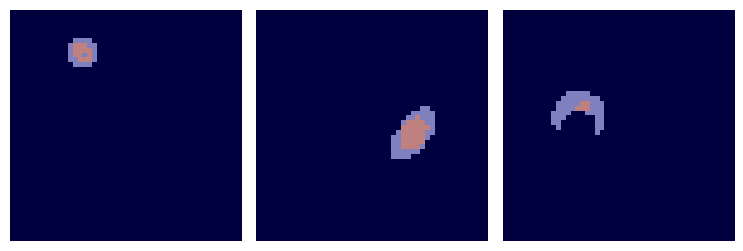

Class 1:
Jaccard Index: 0.3934
True positives %: 95%
False positives: 1.93
Class 2:
Jaccard Index: 0.4283
True positives %: 99%
False positives: 0.03
Class 3:
Jaccard Index: 0.1323
True positives %: 82%
False positives: 0.83


In [27]:
lodestar2_CEM.eval()
outputs_CEM = []
for batch in test_dataloader_CEM:
    data, *_ = batch
    output = lodestar2_CEM((data)).detach()
    outputs_CEM.append(output)

outputs_CEM = torch.cat(outputs_CEM, dim=0)

segmentation_tests(test_dataset_CEM, outputs_CEM)

### CES

In [81]:
# import deeplay as dl

# lodestar2_CES = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3).build()
# trainer_lodestar_CES = dl.Trainer(max_epochs=150, accelerator='cpu')
# trainer_lodestar_CES.fit(lodestar2_CES, train_dataloader_CES)

torch.save(lodestar2_CES.state_dict(), "models/lodestar2_CES.pth")

# lodestar2_CES = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3).build()
# lodestar2_CES.load_state_dict(torch.load('models/lodestar2_CES.pth'))
# lodestar2_CES.eval()

In [ ]:
# lodestar2_CES = LodeSTAR(num_classes=3, n_transforms=2).build()
# lodestar2_CES = clip_grad_training(lodestar2_CES, train_dataloader_CES, 
#                                            num_epochs=50, initial_lr=1e-3, patience=50, best_model=True, clip_grad=True)

# lodestar2_CES.plot_losses()

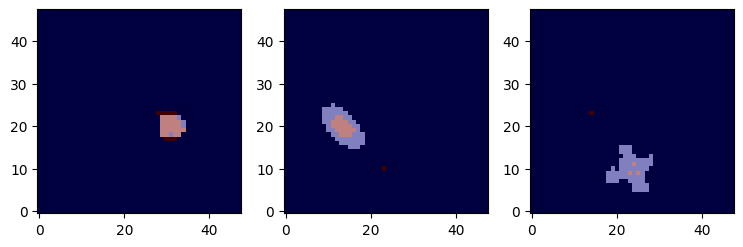

Class 1:
Jaccard Index: 0.6617
True positives %: 86%
False positives: 1.63
Class 2:
Jaccard Index: 0.3198
True positives %: 100%
False positives: 0.17
Class 3:
Jaccard Index: 0.0599
True positives %: 72%
False positives: 1.02


In [ ]:
lodestar2_CES.eval()
outputs_CES = []
for batch in test_dataloader_CES:
    data, *_ = batch
    output = lodestar2_CES((data)).detach()
    outputs_CES.append(output)

outputs_CES = torch.cat(outputs_CES, dim=0)

segmentation_tests(test_dataset_CES, outputs_CES)

### CEF

In [ ]:
# import deeplay as dl

# lodestar2_CEF = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3).build()
# trainer_lodestar_CEF = dl.Trainer(max_epochs=100, accelerator='cpu')
# trainer_lodestar_CEF.fit(lodestar2_CEF, train_dataloader_CEF)

# torch.save(lodestar2_CEF.state_dict(), "models/lodestar2_CEF.pth")

lodestar2_CEF = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3).build()
lodestar2_CEF.load_state_dict(torch.load('models/lodestar2_CEF.pth'))
lodestar2_CEF.eval()

In [ ]:
# lodestar2_CEF = LodeSTAR(num_classes=3, n_transforms=2).build()
# trained_model = clip_grad_training(lodestar2_CEF, train_dataloader_CEF, 
#                                            num_epochs=50, initial_lr=1e-3, patience=10, best_model=True, clip_grad=False)

# trained_model.plot_losses()

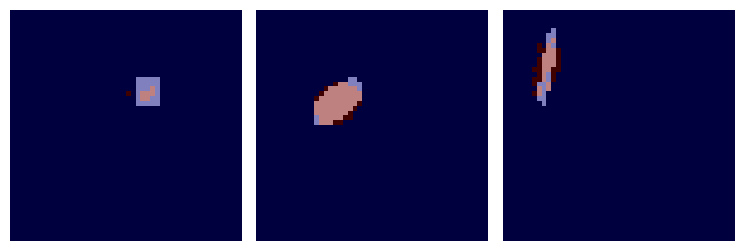

Class 1:
Jaccard Index: 0.2132
True positives %: 72%
False positives: 1.88
Class 2:
Jaccard Index: 0.7035
True positives %: 100%
False positives: 0.02
Class 3:
Jaccard Index: 0.4123
True positives %: 90%
False positives: 1.43


In [ ]:
lodestar2_CEF.eval()
outputs_CEF = []
for batch in test_dataloader_CEF:
    data, *_ = batch
    output = lodestar2_CEF((data)).detach()
    outputs_CEF.append(output)

outputs_CEF = torch.cat(outputs_CEF, dim=0)

segmentation_tests(test_dataset_CEF, outputs_CEF)

### CESq

In [126]:
# import deeplay as dl

# lodestar2_CESq = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3).build()
# trainer_lodestar_CESq = dl.Trainer(max_epochs=50, accelerator='cpu')
# trainer_lodestar_CESq.fit(lodestar2_CESq, train_dataloader_CESq)

# torch.save(lodestar2_CESq.state_dict(), "models/lodestar2_CESq.pth") #77% E

lodestar2_CESq = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3).build()
lodestar2_CESq.load_state_dict(torch.load('models/lodestar2_CESq.pth'))
lodestar2_CESq.eval()

LodeSTAR(
  (model): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): LazyConv2d(0, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (1): Conv2dBlock(
        (layer): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (2): Conv2dBlock(
        (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (layer): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (3-8): 6 x Conv2dBlock(
        (layer): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (9): Conv2dBlock(
        (layer): Conv2d(64, 7, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): Identity()
      )
    )
  )
  (between_loss): L1Loss()
  (within_loss): L1Loss()
  (optimizer): Adam[Adam](lr=0.0001)
  (

In [127]:
# lodestar2_CESq = LodeSTAR(num_classes=3, n_transforms=2).build()
# trained_model = clip_grad_training(lodestar2_CESq, train_dataloader_CESq, 
#                                            num_epochs=39, initial_lr=1e-3, patience=5, best_model=False, clip_grad=True)

# trained_model.plot_losses()

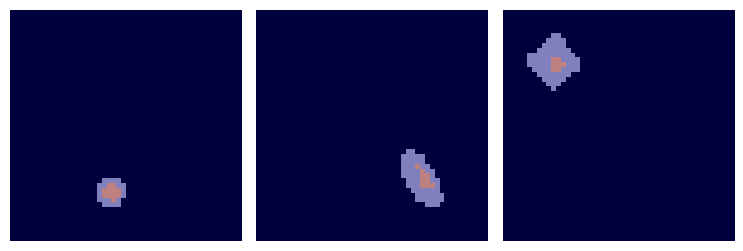

Class 1:
Jaccard Index: 0.4009
True positives %: 100%
False positives: 0.05
Class 2:
Jaccard Index: 0.1477
True positives %: 71%
False positives: 0.73
Class 3:
Jaccard Index: 0.0968
True positives %: 96%
False positives: 0.04


In [128]:
lodestar2_CESq.eval()
outputs_CESq = []
for batch in test_dataloader_CESq:
    data, *_ = batch
    output = lodestar2_CESq((data)).detach()
    outputs_CESq.append(output)

outputs_CESq = torch.cat(outputs_CESq, dim=0)

segmentation_tests(test_dataset_CESq, outputs_CESq)

## Dense dataset

In [ ]:
import deeplay as dl

# lodestar2_CE = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# trainer_lodestar_CE = dl.Trainer(max_epochs=100, accelerator='cpu')
# trainer_lodestar_CE.fit(lodestar2_CE, train_dataloader_CE)

# torch.save(lodestar2_CE.state_dict(), "models/lodestar2_CE.pth")

lodestar2_CE = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
lodestar2_CE.load_state_dict(torch.load('models/lodestar2_CE.pth'))
lodestar2_CE.eval()

LodeSTAR(
  (model): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): LazyConv2d(0, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (1): Conv2dBlock(
        (layer): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (2): Conv2dBlock(
        (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (layer): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (3-8): 6 x Conv2dBlock(
        (layer): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (9): Conv2dBlock(
        (layer): Conv2d(64, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): Identity()
      )
    )
  )
  (between_loss): L1Loss()
  (within_loss): L1Loss()
  (optimizer): Adam[Adam](lr=0.0001)
  (

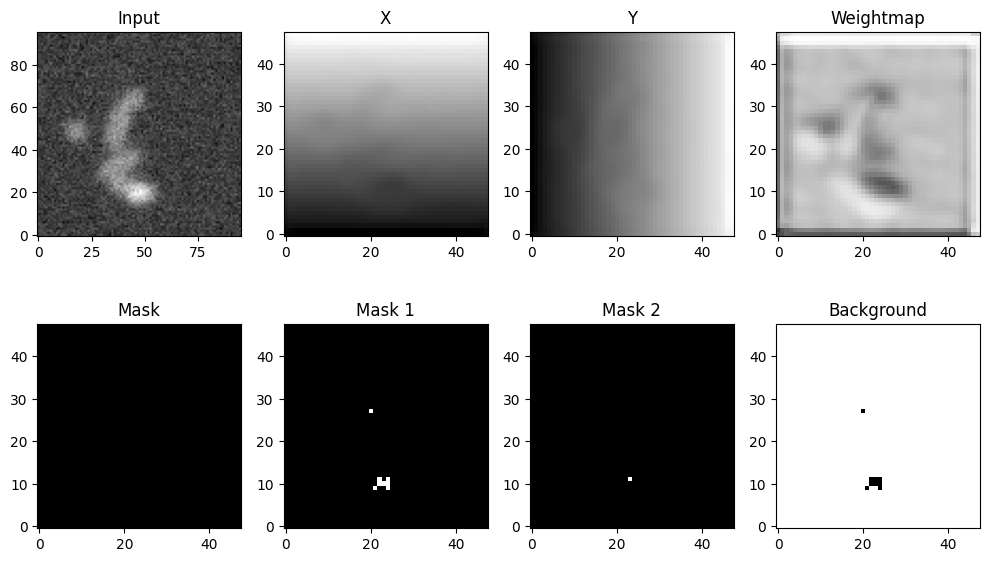

In [ ]:
lodestar2_CE.eval()
data, *_ = next(iter(test_dataloader_CE_d))
output = lodestar2_CE((data)).detach()
import matplotlib.pyplot as plt

x = 5

plt.figure(figsize=(10, 6))
for i in range(8):
	plt.subplot(2, 4, i + 1)
	if i==0:
		plt.imshow(data[x,...].squeeze(), cmap="gray", origin="lower")
		plt.title('Input')
	elif i==1:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower")
		plt.title('X')
	elif i==2:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower")
		plt.title('Y')
	elif i==3:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower", vmin=0,vmax=1)
		plt.title('Weightmap')
	elif i==4:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower")
		plt.title('Mask')
	else:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower", vmin=0,vmax=1)
		if i < 7:
			plt.title('Mask ' + str(i-4))
		else:
			plt.title('Background')
plt.tight_layout()
plt.show()

In [ ]:
outputs_CE = []
for batch in test_dataloader_CE_d:
    data, *_ = batch
    output = lodestar2_CE((data)).detach()
    outputs_CE.append(output)

outputs_CE = torch.cat(outputs_CE, dim=0)

segmentation_tests(test_dataset_CE_d, outputs_CE)

IndexError: tuple index out of range

## Plots multiple runs

C:\Users\alons\AppData\Local\Temp\ipykernel_8552\2867761877.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Jaccard adj', data=df, width=0.5, palette=colors)


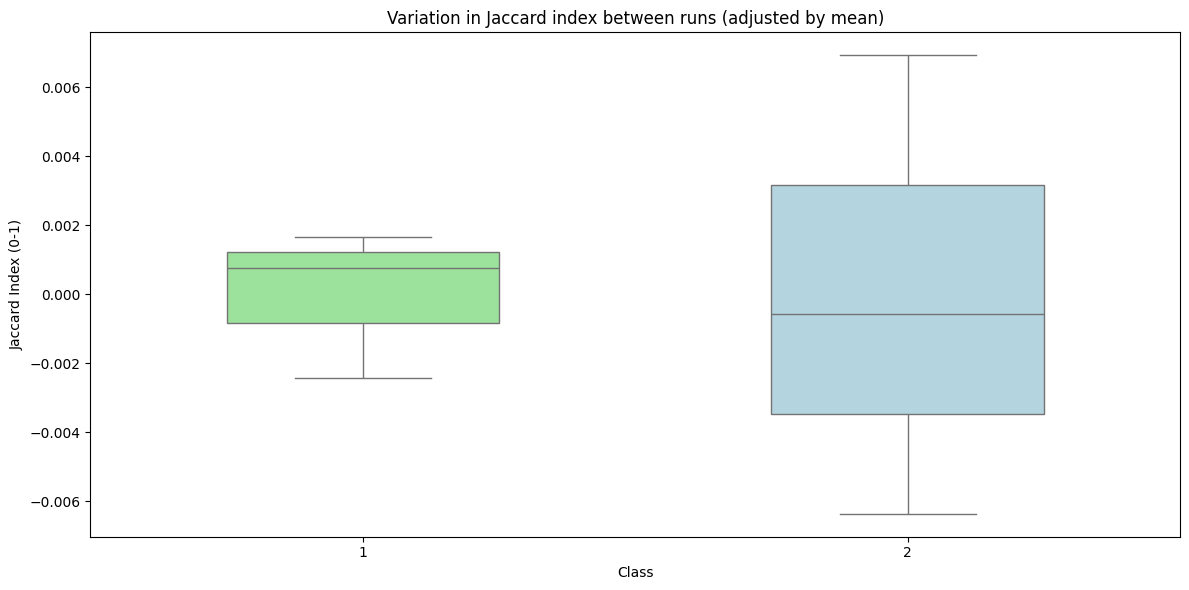

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
df = pd.read_excel('data_CE_runs.xlsx')

# Get unique classes
classes = df['Class'].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Define colors for each class
colors = ['lightgreen', 'lightblue']  # You can change these colors as desired

# Create boxplot with different colors for each class
sns.boxplot(x='Class', y='Jaccard adj', data=df, width=0.5, palette=colors)

# Customize the plot
plt.xlabel('Class')
plt.ylabel('Jaccard Index (0-1)')
plt.title('Variation in Jaccard index between runs (adjusted by mean)')
plt.xticks(rotation=0)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

C:\Users\alons\AppData\Local\Temp\ipykernel_8552\658919071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='True positives adj', data=df, width=0.5, palette=colors)


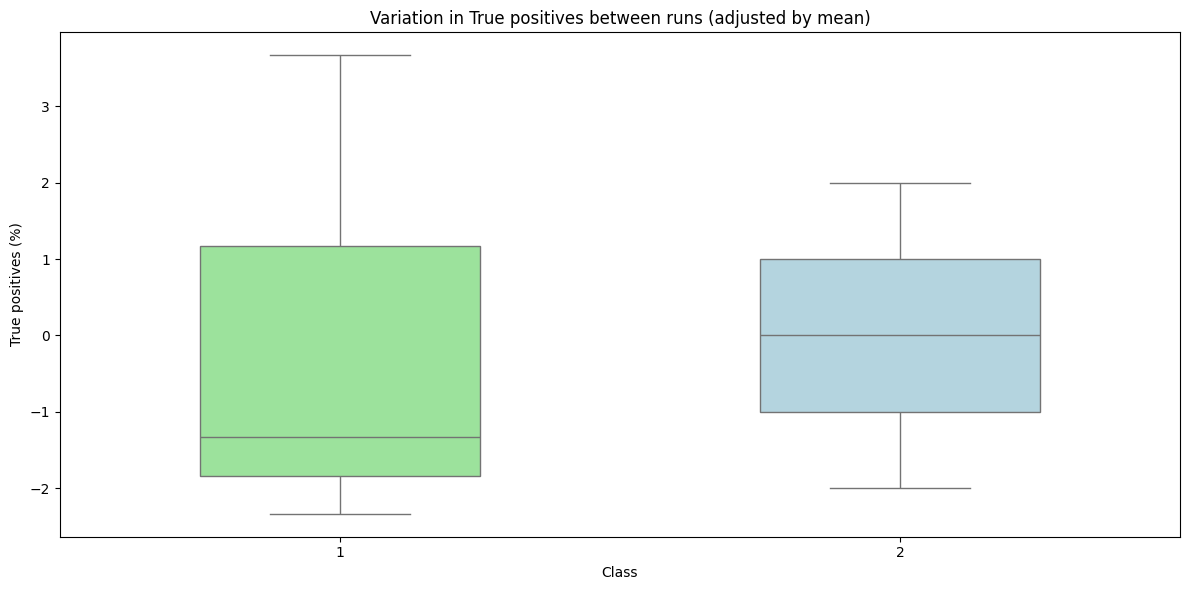

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
df = pd.read_excel('data_CE_runs.xlsx')

# Get unique classes
classes = df['Class'].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Define colors for each class
colors = ['lightgreen', 'lightblue']  # You can change these colors as desired

# Create boxplot with different colors for each class
sns.boxplot(x='Class', y='True positives adj', data=df, width=0.5, palette=colors)

# Customize the plot
plt.xlabel('Class')
plt.ylabel('True positives (%)')
plt.title('Variation in True positives between runs (adjusted by mean)')
plt.xticks(rotation=0)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


C:\Users\alons\AppData\Local\Temp\ipykernel_8552\1403204456.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='False positives adj', data=df, width=0.5, palette=colors)


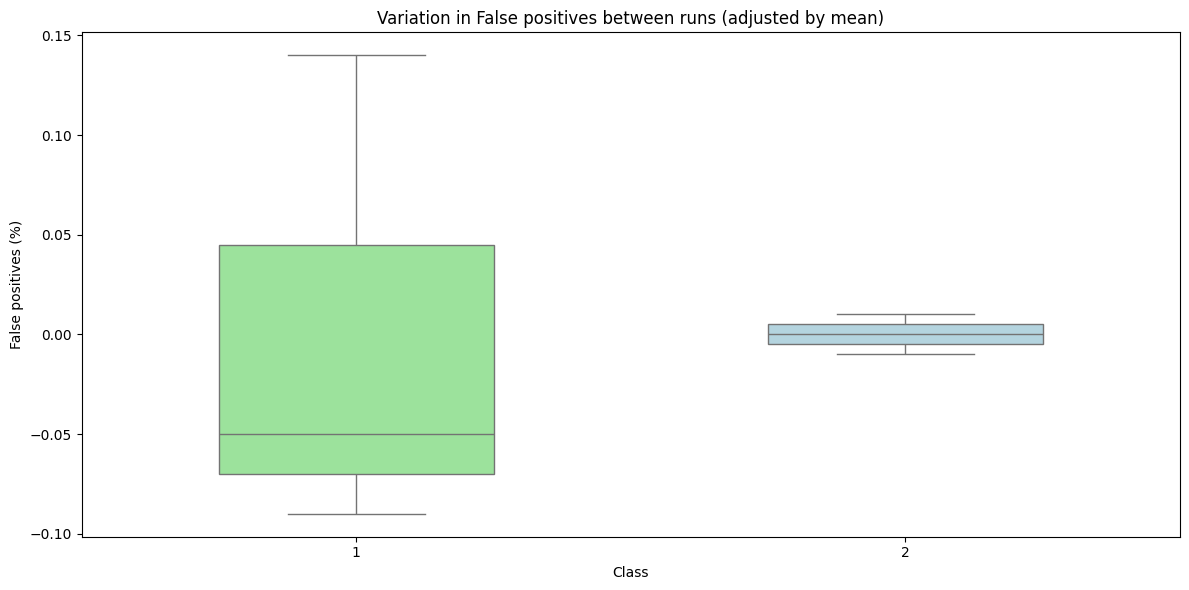

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
df = pd.read_excel('data_CE_runs.xlsx')

# Get unique classes
classes = df['Class'].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Define colors for each class
colors = ['lightgreen', 'lightblue']  # You can change these colors as desired

# Create boxplot with different colors for each class
sns.boxplot(x='Class', y='False positives adj', data=df, width=0.5, palette=colors)

# Customize the plot
plt.xlabel('Class')
plt.ylabel('False positives (%)')
plt.title('Variation in False positives between runs (adjusted by mean)')
plt.xticks(rotation=0)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Plots segmentation

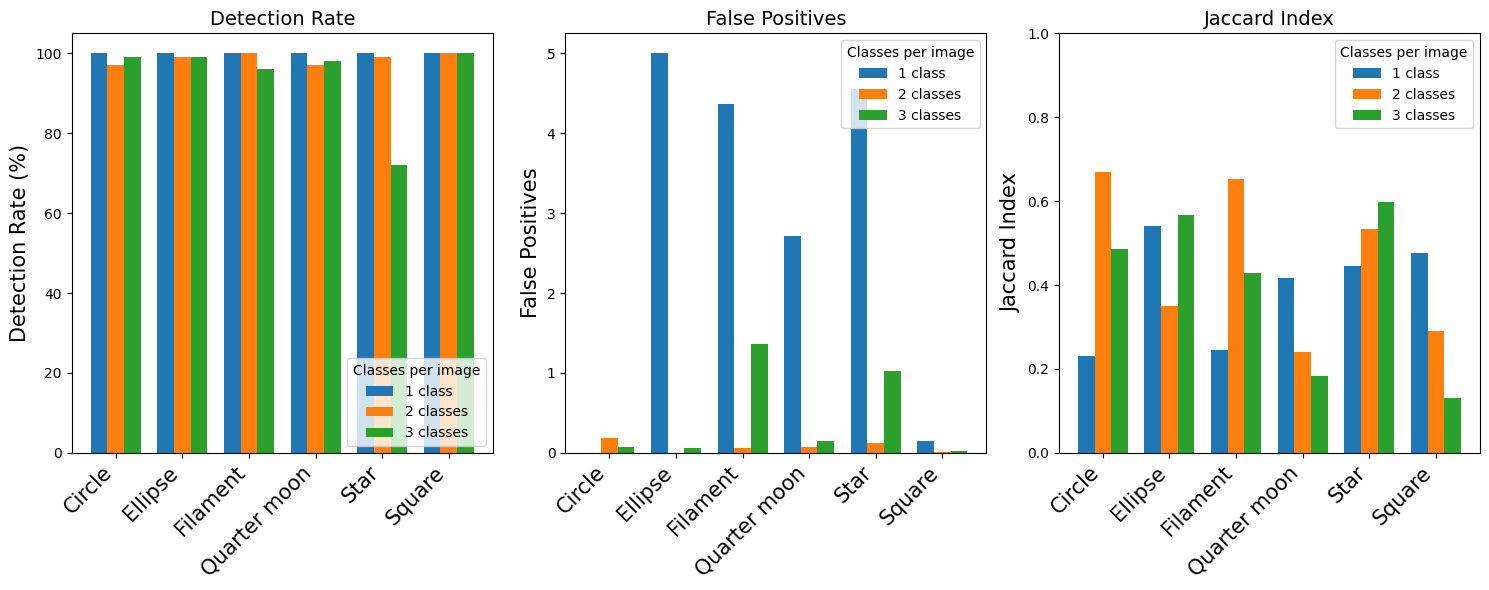

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
particles = ["Circle", "Ellipse", "Filament", "Quarter moon", "Star", "Square"]
classes = ["1 class", "2 classes", "3 classes"]

# Jaccard index data
jaccard_index = [
    [0.23, 0.67, 0.486],  # Circle
    [0.541, 0.349, 0.568],  # Ellipse
    [0.246, 0.654, 0.428],  # Filament
    [0.418, 0.24, 0.183],  # Crescent moon
    [0.446, 0.534, 0.599],  # Star
    [0.477, 0.291, 0.13]  # Square
]

# Detection rate data
detection_rate = [
    [100, 97, 99],  # Circle
    [100, 99, 99],  # Ellipse
    [100, 100, 96],  # Filament
    [100, 97, 98],  # Crescent moon
    [100, 99, 72],  # Star
    [100, 100, 100]  # Square
]

# False positives data
false_positives = [
    [0, 0.19, 0.08],  # Circle
    [5, 0, 0.06],  # Ellipse
    [4.36, 0.057, 1.36],  # Filament
    [2.71, 0.07, 0.15],  # Crescent moon
    [4.55, 0.13, 1.02],  # Star
    [0.15, 0.01, 0.02]  # Square
]

# Convert data to numpy arrays for easier manipulation
jaccard_index = np.array(jaccard_index)
detection_rate = np.array(detection_rate)
false_positives = np.array(false_positives)

# Set up the bar positions
bar_width = 0.25
x = np.arange(len(particles))

# Create the grid of plots (3 rows, 1 column)
fig, axes = plt.subplots(1, 3, figsize=(15, 6)) # 3, 1, figsize=(6, 15)

# Plot for Detection Rate
for i in range(len(classes)):
    axes[0].bar(x + i * bar_width, detection_rate[:, i], width=bar_width, label=classes[i])
axes[0].set_title('Detection Rate', fontsize=14)
axes[0].set_xticks(x + bar_width)
axes[0].set_xticklabels(particles, rotation=45, ha='right', fontsize=15)
axes[0].set_ylabel('Detection Rate (%)', fontsize=15)
axes[0].legend(title="Classes per image", loc='lower right')

# Plot for False Positives
for i in range(len(classes)):
    axes[1].bar(x + i * bar_width, false_positives[:, i], width=bar_width, label=classes[i])
axes[1].set_title('False Positives', fontsize=14)
axes[1].set_xticks(x + bar_width)
axes[1].set_xticklabels(particles, rotation=45, ha='right', fontsize=15)
axes[1].set_ylabel('False Positives', fontsize=15)
axes[1].legend(title="Classes per image")

# Plot for Jaccard Index
for i in range(len(classes)):
    axes[2].bar(x + i * bar_width, jaccard_index[:, i], width=bar_width, label=classes[i])
axes[2].set_title('Jaccard Index', fontsize=14)
axes[2].set_xticks(x + bar_width)
axes[2].set_xticklabels(particles, rotation=45, ha='right', fontsize=15)
axes[2].set_ylabel('Jaccard Index', fontsize=15)
axes[2].legend(title="Classes per image")
axes[2].set_ylim(0, 1)

# Add 'a', 'b', and 'c' to the top left corner of each subplot
# axes[0].text(-0.1, 1.05, 'a', transform=axes[0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
# axes[1].text(-0.1, 1.05, 'b', transform=axes[1].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
# axes[2].text(-0.1, 1.05, 'c', transform=axes[2].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')


# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('bar_plot.png', dpi=300)
plt.show()

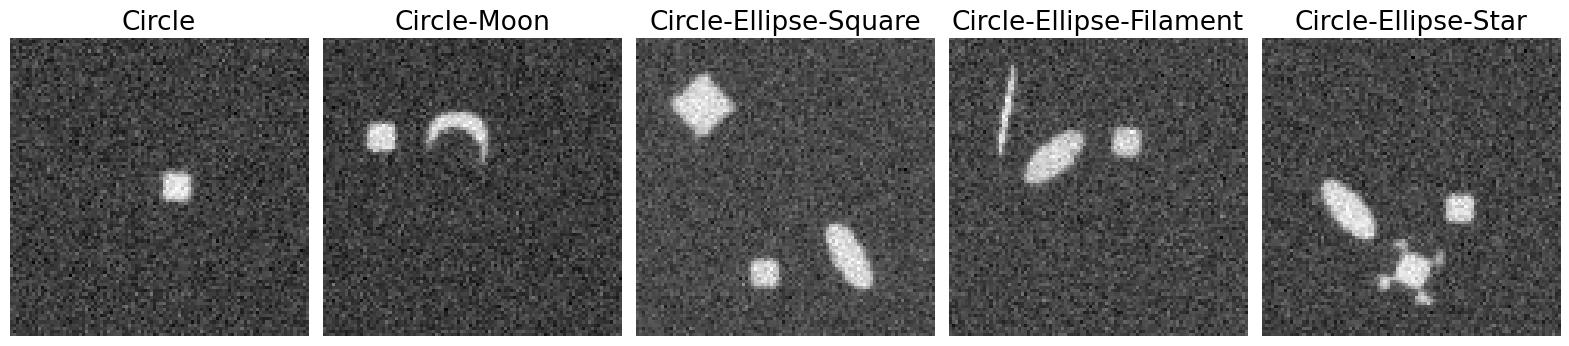

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.figure(figsize=(20, 5))

# Load the first image from each dataset
image_C, *_ = test_dataset_C[0]
image_CM, *_ = test_dataset_CM[0]
image_CESq, *_ = test_dataset_CESq[0]
image_CEF, *_ = test_dataset_CEF[0]
image_CES, *_ = test_dataset_CES[0]

# Plot the images
for i in range(5):
    plt.subplot(1, 5, i + 1)
    if i == 0:
        plt.imshow(image_C[0], cmap="gray", origin="lower")
        plt.title('Circle', fontsize=19)
        plt.axis('off')
    elif i == 1:
        plt.imshow(image_CM[0], cmap="gray", origin="lower")
        plt.title('Circle-Moon', fontsize=19)
        plt.axis('off')
    elif i == 2:
        plt.imshow(image_CESq[0], cmap="gray", origin="lower")
        plt.title('Circle-Ellipse-Square', fontsize=19)
        plt.axis('off')
    elif i == 3:
        plt.imshow(image_CEF[0], cmap="gray", origin="lower")
        plt.title('Circle-Ellipse-Filament', fontsize=19)
        plt.axis('off')
    elif i == 4:
        plt.imshow(image_CES[0], cmap="gray", origin="lower")
        plt.title('Circle-Ellipse-Star', fontsize=19)
        plt.axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()